In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# Global


In [15]:
grad_acc_run2 = torch.load("grad_acc.pt")
grad_acc_run1 = {key:value + random.random()*5 for key, value in grad_acc_run2.items()}
grad_acc_run3 = {key:value - random.random()*5 for key, value in grad_acc_run2.items()}

runs = [grad_acc_run1, grad_acc_run2, grad_acc_run3]

print(runs[0])
print(runs[1])
print(runs[2])

{'epoch_0': 52.34064162535062, 'epoch_1': 6.725569851108121, 'epoch_2': 6.4196803966150675, 'epoch_3': 1.3413590046137431, 'epoch_4': 1.9048351444128306, 'epoch_5': 5.236689106762156}
{'epoch_0': 48.93629000385602, 'epoch_1': 1.7900311708450318, 'epoch_2': 1.500906902551651, 'epoch_3': 1.291727880636851, 'epoch_4': 1.1199237018823625, 'epoch_5': 1.0148386349280676}
{'epoch_0': 48.537985251323065, 'epoch_1': 1.6195320196119163, 'epoch_2': -2.0091699100492084, 'epoch_3': 0.34985943195322344, 'epoch_4': -0.5514258749282877, 'epoch_5': -1.8059164011213236}


Text(0.5, 1.0, 'Average gradient per Epoch')

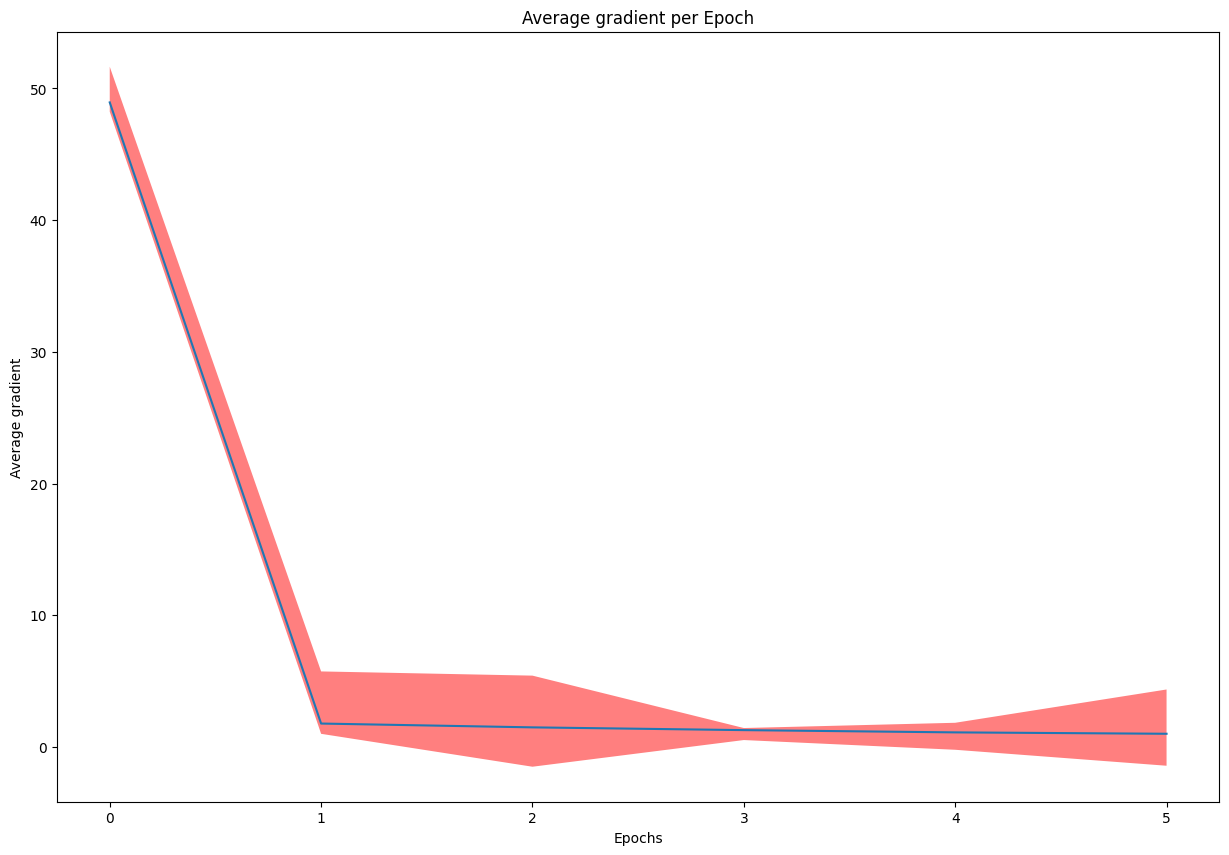

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))

x = np.arange(6)

mean = np.mean([list(run.values()) for run in runs], axis=0)
std = np.std([list(run.values()) for run in runs], axis=0)
ax.plot(x, runs[1].values())

ax.fill_between(
    x,
    mean + std,
    mean - std,
    facecolor="red",
    alpha=0.5,
)

# labels
ax.set_xlabel("Epochs")
ax.set_ylabel("Average gradient")
ax.set_title("Average gradient per epoch")
